<a href="https://colab.research.google.com/github/adre76/Projeto-DAeA/blob/main/projeto_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

Carregando o dataset de machine learning

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/mbti.csv')
dados.columns = ['type', 'posts']

Gráfico com a contagem de tipos MBTI no dataset

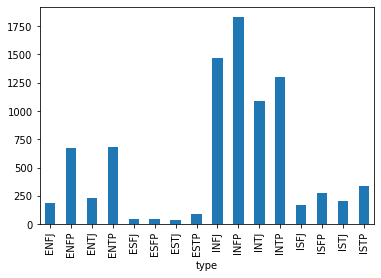

In [3]:
dados.groupby('type').posts.count().plot.bar()
plt.show()

Criando a coluna de ID dos tipos de código MBTI

In [4]:
dados['type_id'] = dados['type'].factorize()[0]
type_id_df = dados[['type', 'type_id']].drop_duplicates().sort_values('type_id')
type_to_id = dict(type_id_df.values)
id_to_type = dict(type_id_df[['type_id', 'type']].values)
labels = dados.type_id

Separando o dataset para o aprendizado

In [5]:
posts = dados["posts"]
classificacoes = dados["type"]

Parametrizando a função de aprendizado de texto do SKLearn e executando o aprendizado de texto.

In [6]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [7]:
  features = tfidf.fit_transform(posts).toarray()
features.shape

(8675, 149867)

Agora, cada uma das 8675 narrativas é representada por 149867 recursos, representando a pontuação tf-idf para diferentes unigramas e bigramas.

Usando sklearn.feature_selection.chi2 para encontrar os termos que estão mais correlacionados com cada classificação MBTI:

In [ ]:
N = 2
for type, type_id in sorted(type_to_id.items()):
  features_chi2 = chi2(features, labels == type_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigramas = [v for v in feature_names if len(v.split(' ')) == 1]
  bigramas = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(type))
  print("  . Unigramas mais correlacionados:\n. {}".format('\n. '.join(unigramas[-N:])))
  print("  . Bigramas mais correlacionados:\n. {}".format('\n. '.join(bigramas[-N:])))

Treinar e testar

Criar entrada de texto e submeter para a IA